In [24]:
%load_ext autoreload
%autoreload 2
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import gymnasium as gym
from agents import SACAgent2
from omegaconf import DictConfig, OmegaConf
from hydra import compose, initialize
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
import wandb
import torch as T
from gymnasium.wrappers import RecordVideo
from EnvironmentUtils import LunarEnvHypercubeFabric, LunarEnvRandomFabric, LunarEnvFixedFabric, ValidationHypercube
from agents import SACAgent2, DDPGAgent, SACAgent, PEARLAgent
import numpy as np
from utils import *
os.environ["SDL_VIDEODRIVER"] = "dummy"
import plotly.express as px
import pandas as pd
import shutil
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import wandb
api = wandb.Api()
# vanilla pearl best run
#run = api.run("tum-adlr-ws22-06/ADLR randomized envs/2eqd07v7")

In [3]:
#runs = [...]
# for each run:
#     download best model
#     create directory with validation/run_name
#     create hypercube with 5 points
#     for each hypercube point:
#          create subdirectory
#          make run, record video
#          store reward in result array
# make 3d plotly plots with reward as point color
# make nice gifs, comparing sac2 with and without domain parameters

In [4]:
runs = ["tum-adlr-ws22-06/ADLR Unified training/28e80wjc"]

In [5]:
run = api.run(runs[0])
agent = load_last_model(get_agent_from_run_cfg(run.config), run)

wandb:   5 of 5 files downloaded.  


Last model loaded from .\artifacts\lunar_lander_model-v1200


In [6]:
training_args = run.config['training']
env_args = run.config['env']
validation_args = run.config['validation']

In [7]:
fabric = LunarEnvHypercubeFabric(pass_env_params=training_args['pass_env_parameters'],
                                                render_mode='rgb_array',
                                                points_per_axis=validation_args[
                                                    "hypercube_points_per_axis"], **env_args)

In [8]:
sampling_traj = 3

In [9]:

#for run_name in runs:
res = []
#run = api.run(run_name)
folder = f"final_validations/{run.name}"
if os.path.exists(folder):
    shutil.rmtree(folder, ignore_errors=True)
os.mkdir(folder)
print(run.name)
#agent = load_best_model(get_agent_from_run_cfg(run.config), run)
#fabric = LunarEnvHypercubeFabric(run.config['training']['pass_env_parameters'], run.config['env'], points_per_axis=5, render_mode='rgb_array') 
number_points = fabric.number_of_test_points()
all_actions = []

for i in range(number_points):
    env = fabric.generate_env()[2]
    gravity, wind_power, turbulence_power = env.gravity, env.wind_power, env.turbulence_power
    video_path = f"{folder}/gravity_{gravity}_wind_{wind_power}_turbulence_{turbulence_power}/"
    os.mkdir(video_path)
    #env = RecordVideo(env, video_folder=video_path)
    action_list = []
    
    env = RecordVideo(env, video_folder=video_path)
    obs, _ = env.reset()
    rewards = 0
    while True:

        # Get deterministic action
        with T.no_grad():
            action = agent.action(obs, addNoise=False)
        action_list.append(action)

        # Take step in environment
        new_obs, reward, done, _, _ = env.step(action)

        # Update obs
        obs = new_obs

        # Update rewards
        rewards += reward

        # End episode if done
        if done:
            break
    all_actions.append(action_list)
    print(f"gravity: {gravity}, wind_power: {wind_power}, turbulence_power: {turbulence_power}, reward: {rewards}")
    res.append({"gravity": gravity, "wind_power": wind_power, "turbulence_power": turbulence_power, "reward": rewards})
df = pd.DataFrame(res)
df.to_csv(f"{folder}/results.csv", index=False)

sac2_ood_no_env


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4
gravity: -11.999, wind_power: 5.0, turbulence_power: 0.6, reward: -4.378185452414726
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4
gravity: -11.999, wind_power: 5.0, turbulence_power: 0.8, reward: -32.35457532636694
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4
gravity: -11.999, wind_power: 5.0, turbulence_power: 1.0, reward: -37.23863034799199
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -11.999, wind_power: 7.5, turbulence_power: 0.6, reward: -59.25526186010501
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -11.999, wind_power: 7.5, turbulence_power: 0.8, reward: 8.078264225310136
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -11.999, wind_power: 7.5, turbulence_power: 1.0, reward: -17.694094058635244
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4
gravity: -11.999, wind_power: 10.0, turbulence_power: 0.6, reward: 5.286489427031142
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -11.999, wind_power: 10.0, turbulence_power: 0.8, reward: 2.255319372755636
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-11.999_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4
gravity: -11.999, wind_power: 10.0, turbulence_power: 1.0, reward: -68.02797670860159


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 5.0, turbulence_power: 0.6, reward: 10.361941247191538
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 5.0, turbulence_power: 0.8, reward: 12.154337255898596
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 5.0, turbulence_power: 1.0, reward: 2.1949480807942194
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4
gravity: -9.499500000000001, wind_power: 7.5, turbulence_power: 0.6, reward: -2.6723786302375174
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 7.5, turbulence_power: 0.8, reward: -1.6779072164386264
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 7.5, turbulence_power: 1.0, reward: -15.893124925903948
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 10.0, turbulence_power: 0.6, reward: -13.220253199518666
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -9.499500000000001, wind_power: 10.0, turbulence_power: 0.8, reward: -26.797994916267143
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-9.499500000000001_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4
gravity: -9.499500000000001, wind_power: 10.0, turbulence_power: 1.0, reward: -54.65681331401825
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.6\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -7.0, wind_power: 5.0, turbulence_power: 0.6, reward: -10.44943283432778
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_0.8\rl-video-episode-0.mp4
gravity: -7.0, wind_power: 5.0, turbulence_power: 0.8, reward: 300.49748604753944
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_5.0_turbulence_1.0\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -7.0, wind_power: 5.0, turbulence_power: 1.0, reward: -0.34093629257795044
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.6\rl-video-episode-0.mp4
gravity: -7.0, wind_power: 7.5, turbulence_power: 0.6, reward: -12.193916127689562
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_0.8\rl-video-episode-0.mp4
gravity: -7.0, wind_power: 7.5, turbulence_power: 0.8, reward: -11.185905060897838
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.6 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_7.5_turbulence_1.0\rl-video-episode-0.mp4
gravity: -7.0, wind_power: 7.5, turbulence_power: 1.0, reward: -28.58187607085324
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4



c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.8 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.6\rl-video-episode-0.mp4
gravity: -7.0, wind_power: 10.0, turbulence_power: 0.6, reward: 287.9759698386483
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_0.8\rl-video-episode-0.mp4


c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_1.0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


gravity: -7.0, wind_power: 10.0, turbulence_power: 0.8, reward: 5.296875558390596
Moviepy - Building video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4.
Moviepy - Writing video d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready d:\Desktop\reps\TUM WS22\tum-adlr-ws22-06\final_validations\sac2_ood_no_env\gravity_-7.0_wind_10.0_turbulence_1.0\rl-video-episode-0.mp4
gravity: -7.0, wind_power: 10.0, turbulence_power: 1.0, reward: 315.10491695493795


In [10]:
all_actions = [np.array(actions) for actions in all_actions]

In [11]:
df = pd.DataFrame(res)


In [12]:
# SHOW HOW PEARL WORKS FOR THE BEST SAC2 CASE, HOW TO WORST
# and, the opposite

In [30]:
task_id = 8

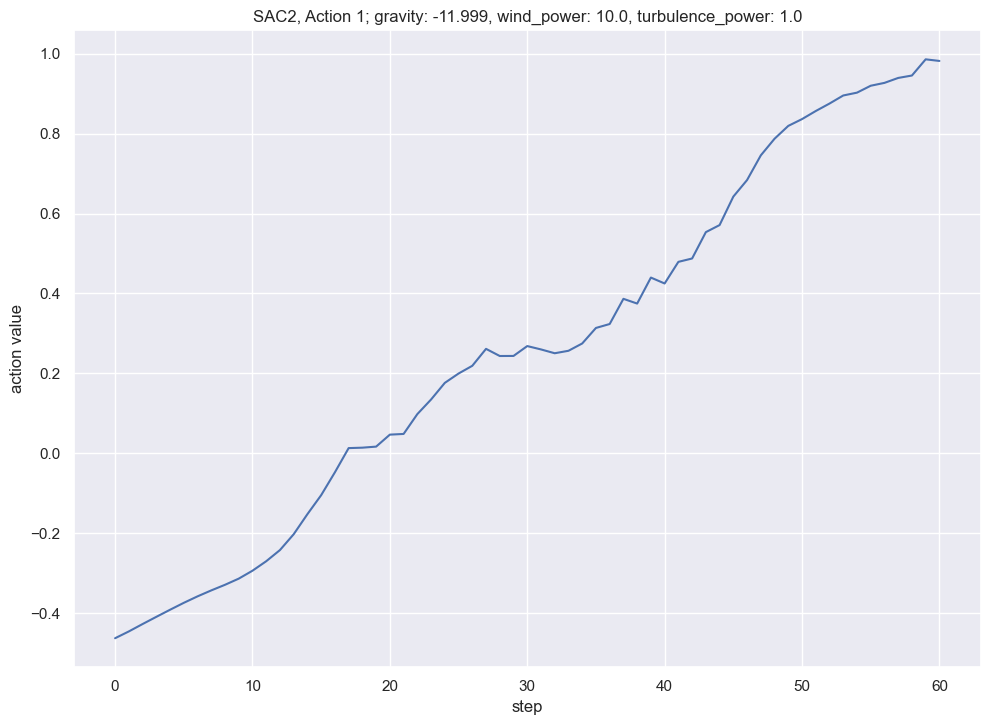

In [31]:
#lineplot of first actions
plt.plot(all_actions[task_id][:, 0]);
#title with env params from df
plt.title(f"SAC2, Action 1; gravity: {df['gravity'][task_id]}, wind_power: {df['wind_power'][task_id]}, turbulence_power: {df['turbulence_power'][task_id]}");
plt.xlabel('step');
plt.ylabel('action value');
#plt.title("PEARL, Action 1");

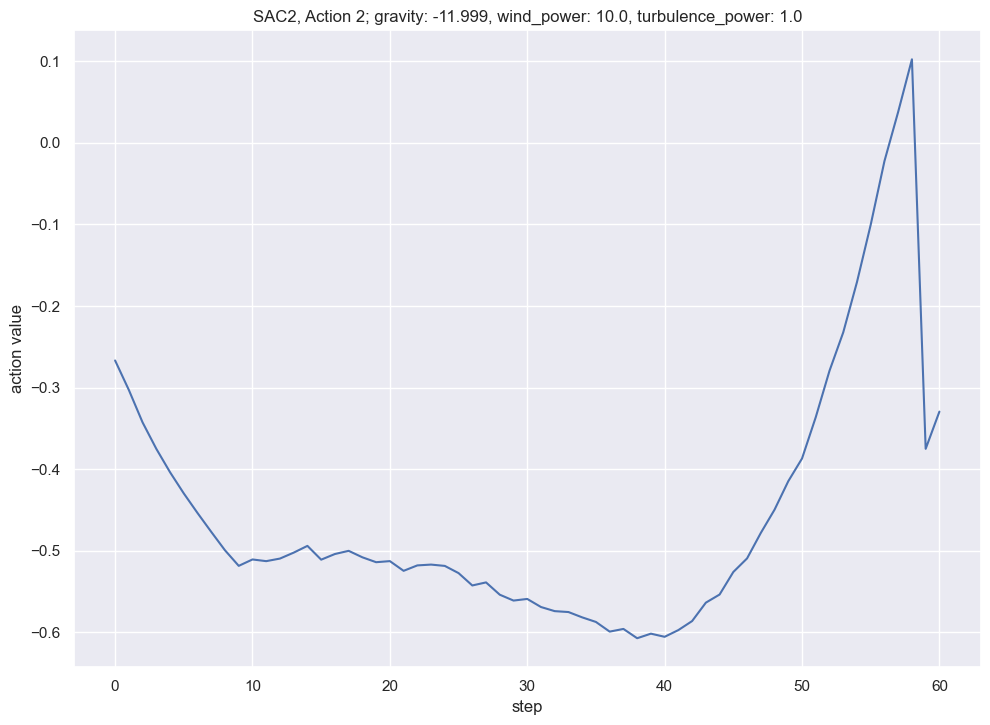

In [32]:
#lineplot of first actions
plt.plot(all_actions[task_id][:, 1]);
plt.title(f"SAC2, Action 2; gravity: {df['gravity'][task_id]}, wind_power: {df['wind_power'][task_id]}, turbulence_power: {df['turbulence_power'][task_id]}");
plt.xlabel('step');
plt.ylabel('action value');

In [16]:
fig = px.scatter_3d(df, x='gravity', y='wind_power', z='turbulence_power',
              color='reward')
fig.show()

In [7]:
with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
    

In [10]:
env_fabric = LunarEnvHypercubeFabric(env_params=cfg.env, pass_env_params=True)
env = env_fabric.generate_env()
env_info = {"input_dims":env.observation_space.shape, "n_actions": env.action_space.shape[0], "max_action": env.action_space.high}

c:\Users\volob\.conda\envs\adlr\lib\site-packages\gymnasium\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [19]:
@widgets.interact_manual(g=(-12.0, 0.0), wind_power=(0.0, 20.0), turbulence_power=(0.0, 2.0)
                         )
def make_video(g=-10, wind_power=0.0, turbulence_power=0.0, plot_every_action=5):
    env = gym.make('LunarLander-v2', continuous=True, render_mode='rgb_array', gravity=g , enable_wind=True, wind_power=wind_power, 
             turbulence_power=turbulence_power)
    obs, info = env.reset()
    step = 0
    while True:
        action = agent.action(obs, addNoise=False)
        new_obs, reward, done, _, _ = env.step(action)
        if step % plot_every_action == 0:
            clear_output(wait=True)
            plt.imshow( env.render())
            plt.show()
        step += 1
        if done:
            break
    env.close()

interactive(children=(FloatSlider(value=-10.0, description='g', max=0.0, min=-12.0), FloatSlider(value=0.0, de…